# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/machinelearning-az.git

Cloning into 'machinelearning-az'...
remote: Enumerating objects: 10497, done.
remote: Total 10497 (delta 0), reused 0 (delta 0), pack-reused 10497
Receiving objects: 100% (10497/10497), 310.48 MiB | 31.04 MiB/s, done.
Resolving deltas: 100% (213/213), done.
Checking out files: 100% (10250/10250), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

#Google colab tools

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

#Instalar dependendias

In [3]:
!pip install sklearn

# SVR

# Cómo importar las librerías


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [51]:
dataset = pd.read_csv('/content/machinelearning-az/datasets/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
#print(X)
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


# Dividir el data set en conjunto de entrenamiento y conjunto de testing


In [ ]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
"""

# Escalado de variables

In [52]:
#Escalando variables para la solución final
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Ajustar la regresión con el dataset

In [42]:
from sklearn.svm import SVR

In [53]:
regression = SVR(kernel = "rbf")
regression.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predicción de nuestros modelos con SVR


In [54]:
#Primera predicción, no aplica para la solución final - Sin escalar las variables
y_pred = regression.predict([[6.5]])
print(y_pred)

[0.01158103]


# Visualización de los resultados del SVR

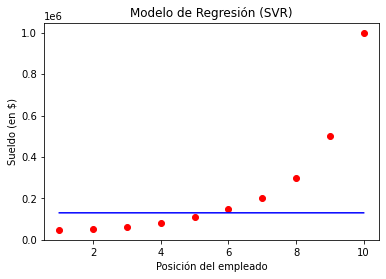

In [9]:
#X_grid = np.arange(min(X), max(X), 0.1)
#X_grid = X_grid.reshape(len(X_grid), 1)

#Visualización con la primera predicción y escalados
plt.scatter(X, y, color = "red")
plt.plot(X, regression.predict(X), color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [55]:
#Segunda predicción con el escalado de variables y mostrando el dato inverso al escalado
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[6.5]]))))
print(y_pred)

[170370.0204065]


<function matplotlib.pyplot.show>

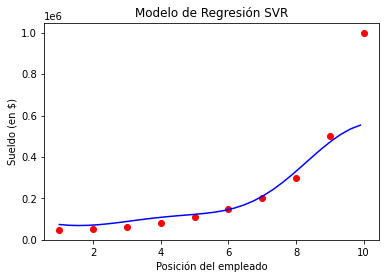

In [61]:
#Visualización con la segunda predicción y escalados
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
#Volver a los valores originales de X e Y. Ya que al escalar nos vuelve a los valores regularizados
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red") # dibujar nube de puntos del dataset original (X,y)
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regression.predict(X_grid)), color="blue") # dibujar el eje x como  el eje x del dataset ("X"), y en las coordenadas "y" la predicción de regresión lineal para esos "X_poly"
plt.title("Modelo de Regresión SVR")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show